In [1]:
import numpy as np
import sympy as sy
import math
import gc
from numpy.random import default_rng
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#
#Definimos las matrices de Gell-Mann
#

l0 = (np.sqrt(2/3))*np.array([[1,0,0],[0,1,0],[0,0,1]])
l1 = np.array([[0,1,0],[1,0,0],[0,0,0]])
l2 = np.array([[0,-1j,0],[1j,0,0],[0,0,0]])
l3 = np.array([[1,0,0],[0,-1,0],[0,0,0]])
l4 = np.array([[0,0,1],[0,0,0],[1,0,0]])
l5 = np.array([[0,0,-1j],[0,0,0],[1j,0,0]])
l6 = np.array([[0,0,0],[0,0,1],[0,1,0]])
l7 = np.array([[0,0,0],[0,0,-1j],[0,1j,0]])
l8 = (1/math.sqrt(3))*np.array([[1,0,0],[0,1,0],[0,0,-2]])

#
#Definimos el producto entre matrices y los coeficientes matriciales;
#
Ra = default_rng(42).random((3,3))
def matrixdot(A,B):
    return np.trace(A@B)/2

def matrixcoeff(A):
    cr = np.zeros(shape=(9), dtype = 'complex_')
    for n in range(0,9):
        cr[n] = matrixdot(A,lam[n])
    return cr

#Datos númericos (Masas M y sus errores dM)
#Quarks up eV
u = 2.16e+6
du= 0.49e+6
c = 1.27e+9
dc= 0.02e+9
t = 1.7269e+11
dt= 0.30e+9
#Quarks down eV
d = 4.67e+6
dd= 0.48e+6
s = 9.34e+7
ds= 8.6e+6
b = 4.18e+9
db= 0.03e+9
#Leptones Cargados eV
e   = 5.1099895e+5
de  = 1.5e-4
mu  = 1.0565838e+8
dmu = 2.3
tau = 1.77686e+9
dtau= 1.20e+5
#Diferencias de masas al cuadrado de neutrinos eV^2
Del21 = 7.53e-5
dDel21= 0.18e-5
Del32 = 2.437e-3
dDel32= 0.033e-3

#
# Definimos las matrices diagonales para las masas de los quarks; up, down y leptones cargados.
#
Mu = (1/t)*np.diagflat([u,c,t], 0)
Md = (1/b)*np.diagflat([d,s,b],0)
Ml = (1/tau)*np.diagflat([e,mu,tau],0)

#Se calculan los coeficientes de las matrices (no recuerdo para que)
#matrixcoeff(Mu)
#matrixcoeff(Md)
#matrixcoeff(Ml)

#Calculamos $C_0$ para $M$
C0u = matrixdot(l0, Mu)
C0d = matrixdot(l0, Md)
C0l = matrixdot(l0, Ml)

C3u = matrixdot(l3, Mu)
C3d = matrixdot(l3, Md)
C3l = matrixdot(l3, Ml)

C8u = matrixdot(l8, Mu)
C8d = matrixdot(l8, Md)
C8l = matrixdot(l8, Ml)

#Calculamos la derivada de $C_0$ respecto a las masas en $M_u, M_d y M_l$.
C0Mu = 1/t
C0Mc = 1/t
C0Mt = -(u+c)/t**2
DC0u = (C0Mu*du + C0Mc*dc + C0Mt*dt)

C0Md = 1/b
C0Ms = 1/b
C0Mb = -(d+s)/b**2
DC0d = (C0Md*dd + C0Ms*ds + C0Mb*db)

C0Me = 1/tau
C0Mmu = 1/tau
C0Mtau = (e+mu)/tau**2
DC0l = (C0Me*de + C0Mmu*dmu + C0Mtau*dtau)

C03 = 2*np.sqrt(3/2)*C0l
C33 = 2*C3l
C83 = 2*C8l

gc.collect()

0

In [2]:
#Majorana Caso 2
x2 = np.arange(0,5,0.01)
Corre1_C2 = np.arange(0, 5, 0.01)
Corre2_C2 = np.arange(0, 5, 0.01)
X2, Y2 = np.meshgrid(x2, Corre1_C2)
X3, Y3 = np.meshgrid(x2, Corre2_C2)

## **Ahora vemos el segundo caso considerando que las masas son una mezcla de Dirac y Majorana y que ademas tenemos: $\\ m_1 \rightarrow \frac{m_1}{\delta_1}$, $\quad m_2 \rightarrow \frac{m_2}{\delta_2}$**

In [3]:
def m21(x,r1):
    return ((x*r1*(C33+C03)-(x*r1))/2)

def m23(x,r2):
    return ((x*r2*(C03-C33)-(x*r2))/2)

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\;'
<>:21: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\;'
<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\;'
<>:21: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\;'
<>:33: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_38774/1590810227.py:5: SyntaxWarning: invalid escape sequence '\D'
  line1, = ax.plot(x2, y1C2, linewidth=2.0, label='$\Delta m_{21}^2$', linestyle='dashed')
/tmp/ipykernel_38774/1590810227.py:6: SyntaxWarning: invalid escape sequence '\D'
  line2, = ax.plot(x2, y2C2, linewidth=2.0, label='$\Delta m_{32}^2$', linestyle='dashdot')
/tmp/ipykernel_38774/1590810227.py:20: Syntax

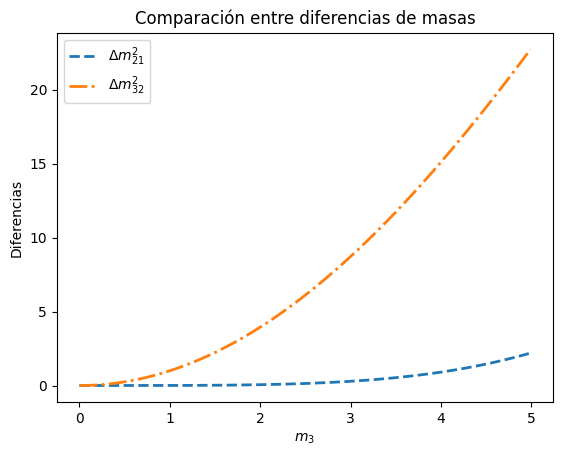

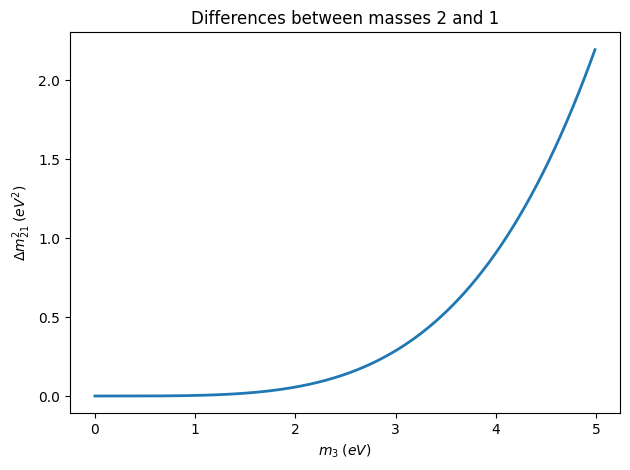

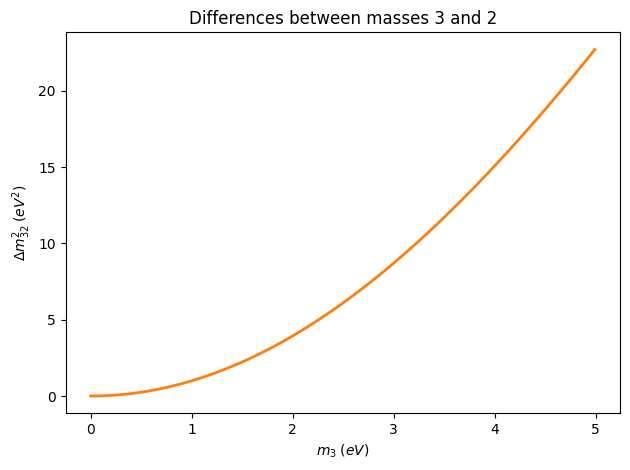

4874

In [4]:
y1C2 = m23(x2,Corre2_C2)**2-m21(x2,Corre1_C2)**2
y2C2 = x2**2-m23(x2,Corre2_C2)**2

fig, ax = plt.subplots()
line1, = ax.plot(x2, y1C2, linewidth=2.0, label='$\Delta m_{21}^2$', linestyle='dashed')
line2, = ax.plot(x2, y2C2, linewidth=2.0, label='$\Delta m_{32}^2$', linestyle='dashdot')
ax.set_xlabel('$m_3$')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre diferencias de masas')
ax.legend()
#plt.savefig("g6.png", dpi=300)
plt.show()


##
# Aqui nos enfocamos en el comportamiento de la delta 2-1
##
fig, ax = plt.subplots()
ax.plot(x2, y1C2, linewidth=2.0)
ax.set_xlabel('$m_3\; (eV)$')
ax.set_ylabel('$\Delta m_{21}^2\; (eV^2)$')
ax.set_title('Differences between masses 2 and 1')
plt.tight_layout()
#plt.savefig("g7eng.png", dpi=300)
plt.show()

##
# Aqui nos enfocamos en el comportamiento de la delta 3-2
##
fig, ax = plt.subplots()
ax.plot(x2, y2C2, linewidth=2.0, color='tab:orange')
ax.set_xlabel('$m_3\; (eV)$')
ax.set_ylabel('$\Delta m_{32}^2\; (eV^2)$')
ax.set_title('Differences between masses 3 and 2')
plt.tight_layout()
#plt.savefig("g7eng.png", dpi=300)
plt.show()

gc.collect()

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:37: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_38774/3725644216.py:8: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title('$\Delta m_{21}^2 - \Delta m_{21_{exp}}^2$')
/tmp/ipykernel_38774/3725644216.py:10: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\delta$', rotation=0)
/tmp/ipykernel_38774/3725644216.py:19: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title('$\Delta m_{32}^2 - \Delta 

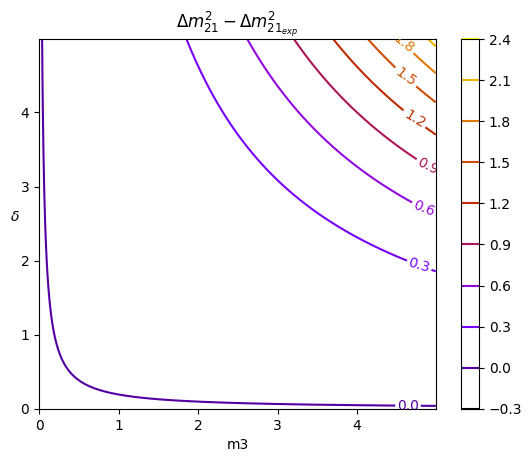

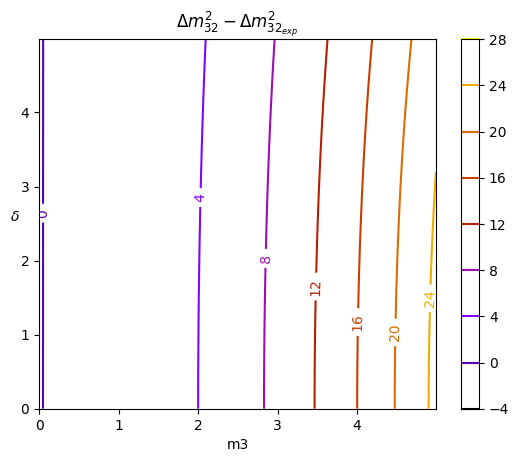

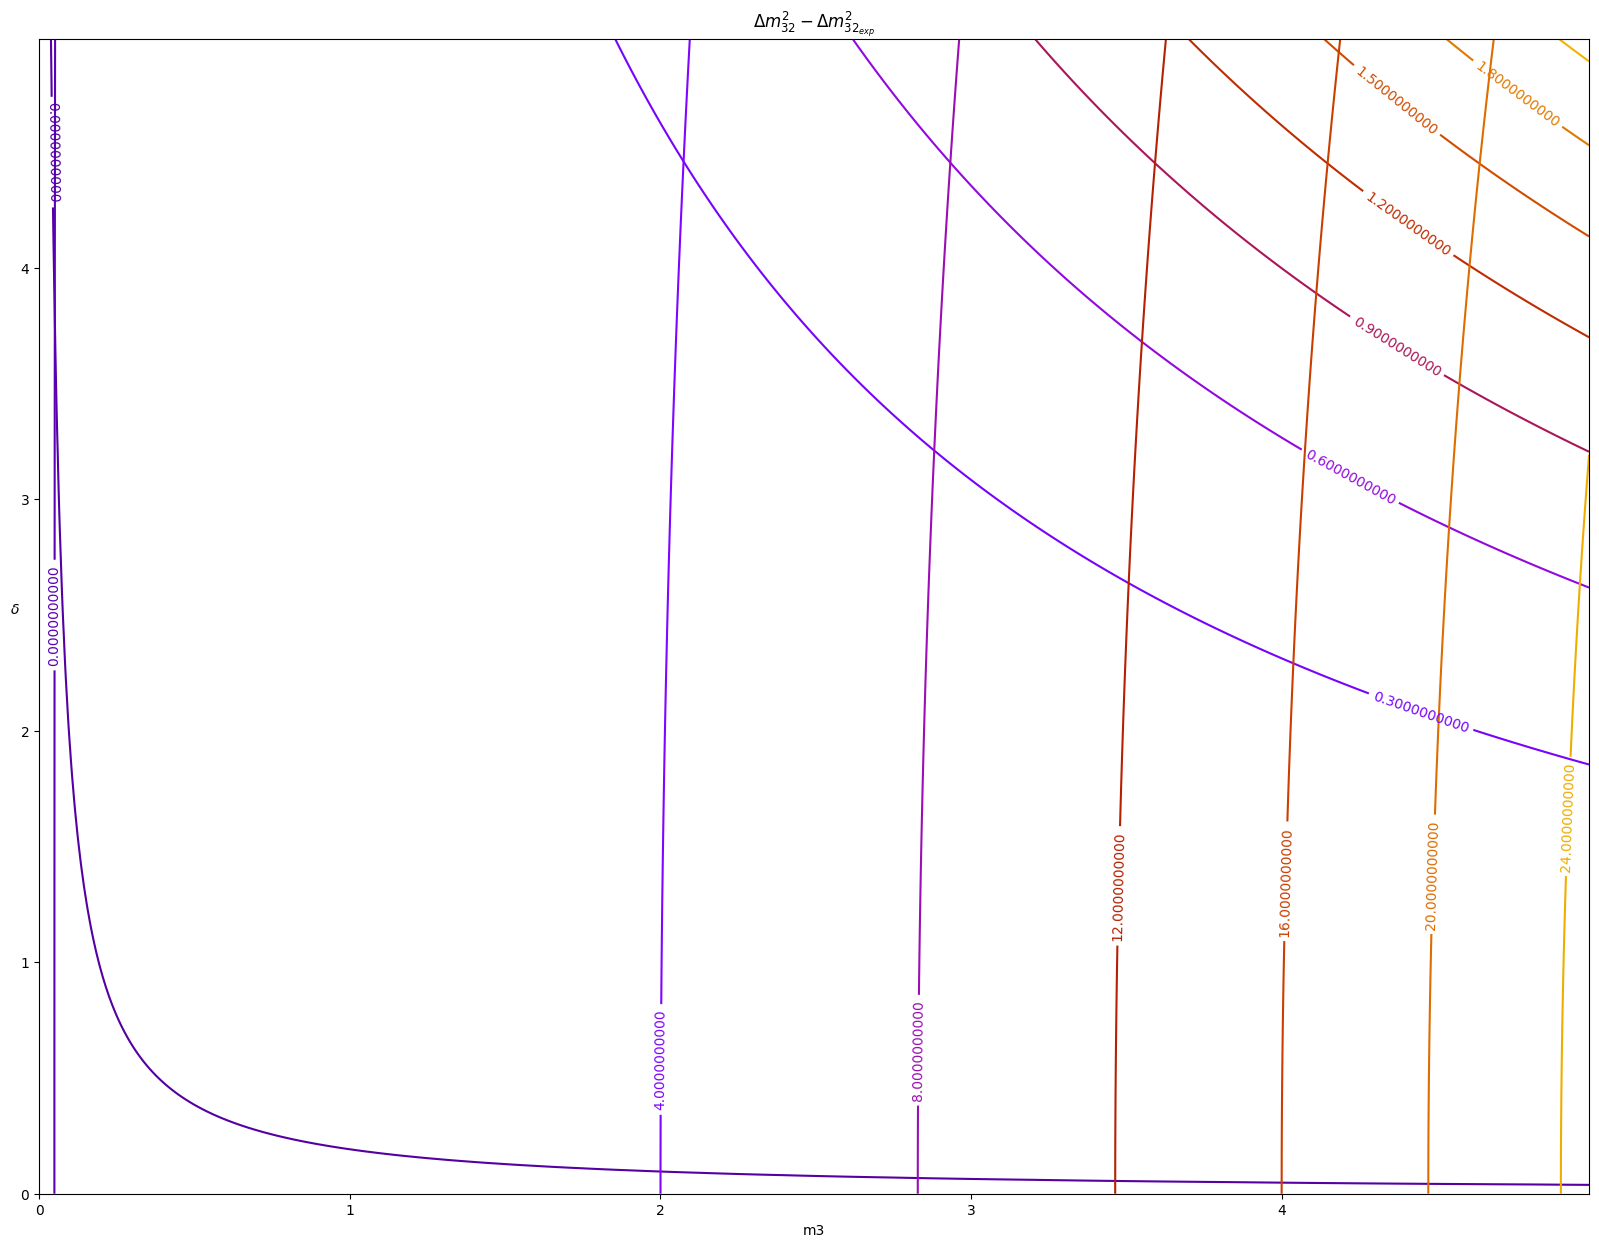

16270

In [5]:
Z2_0 = m23(X3, Y3)**2 - m21(X3, Y2)
Z2_1 = X3**2 - m23(X3,Y3)**2

fig,ax = plt.subplots()
cp2_0 = ax.contour(X3, Y2, Z2_0 - Del21, cmap= 'gnuplot')
ax.clabel(cp2_0, inline=True, fontsize=10)
fig.colorbar(cp2_0)
ax.set_title('$\Delta m_{21}^2 - \Delta m_{21_{exp}}^2$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)
#plt.savefig("g9morado.png", dpi=300)
plt.show()


fig,ax = plt.subplots()
cp2_1 = ax.contour(X3, Y3, Z2_1 - Del32, cmap= 'gnuplot')
ax.clabel(cp2_1, inline=True, fontsize=10)
fig.colorbar(cp2_1)
ax.set_title('$\Delta m_{32}^2 - \Delta m_{32_{exp}}^2$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)
#plt.savefig("g9morado.png", dpi=300)
plt.show()

fig,ax=plt.subplots(figsize=(20,15))

cp2_0 = ax.contour(X3, Y2, Z2_0 - Del21, cmap= 'gnuplot')
cp2_1 = ax.contour(X3, Y3, Z2_1 - Del32, cmap= 'gnuplot')

ax.clabel(cp2_0, inline=True, fontsize=10, fmt='%1.10f')
ax.clabel(cp2_1, inline=True, fontsize=10, fmt='%1.10f')
#fig.colorbar(cp2_0)
#fig.colorbar(cp2_1)

ax.set_title('$\Delta m_{32}^2 - \Delta m_{32_{exp}}^2$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)
#plt.savefig("g9morado.png", dpi=300)
#plt.xlim(0,0.5)
#plt.ylim(0,10)
plt.show()

gc.collect()

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_38774/80132303.py:16: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title('$\Delta m_{32}^2 - \Delta m_{32_{exp}}^2$')
/tmp/ipykernel_38774/80132303.py:18: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\delta$', rotation=0)


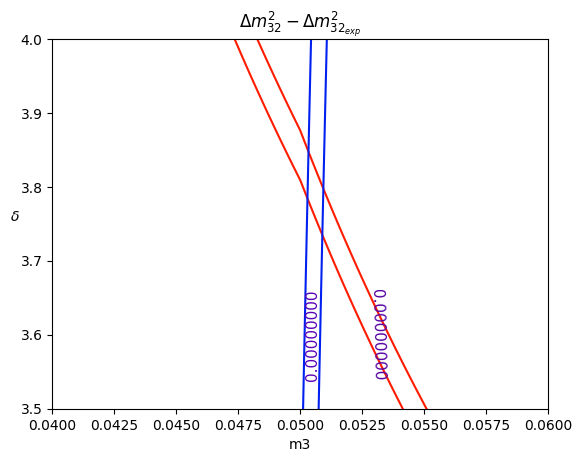

4754

In [21]:
fig,ax=plt.subplots()
#figsize=(15,10)

cp2_0  = ax.contour(X3, Y2, Z2_0 - Del21, cmap= 'gnuplot')
cp2_01 = ax.contour(X3, Y2, (Z2_0 - Del21)-dDel21, cmap= 'autumn')
cp2_02 = ax.contour(X3, Y2, (Z2_0 - Del21)+dDel21, cmap= 'autumn')
cp2_1  = ax.contour(X3, Y3, Z2_1 - Del32, cmap= 'gnuplot')
cp2_11 = ax.contour(X3, Y3, (Z2_1 - Del32)-dDel32, cmap= 'winter')
cp2_12 = ax.contour(X3, Y3, (Z2_1 - Del32)+dDel32, cmap= 'winter')

manu=[(0.06,3.6)]
ax.clabel(cp2_0, inline=True,fontsize=11, manual=manu, fmt='%1.8f')
ax.clabel(cp2_1, inline=True,fontsize=11, manual=manu, fmt='%1.8f')
#fig.colorbar(cp2_0)
#fig.colorbar(cp2_1)
ax.set_title('$\Delta m_{32}^2 - \Delta m_{32_{exp}}^2$')
ax.set_xlabel('m3')
ax.set_ylabel('$\delta$', rotation=0)
#plt.savefig("g9morado.png", dpi=300)

#plt.xlim([0.0502,0.051])
#plt.ylim([3.7,3.9])

plt.xlim([0.04,0.06])
plt.ylim([3.5,4])
plt.show()

gc.collect()

<>:156: SyntaxWarning: invalid escape sequence '\d'
<>:156: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_38774/1874360823.py:156: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\delta$', rotation=0)
/tmp/ipykernel_38774/1874360823.py:48: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for linecol in cp2_0.collections:
/tmp/ipykernel_38774/1874360823.py:50: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for linecol2 in cp2_11.collections:
/tmp/ipykernel_38774/1874360823.py:58: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for linecol in cp2_0.collections:
/tmp/ipykernel_38774/1874360823.py:60: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be rem

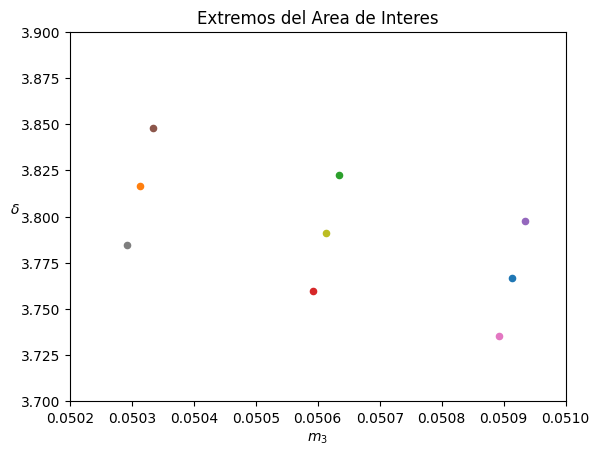

4712

In [7]:
def find_intersections(A, B):
    #this function stolen from https://stackoverflow.com/questions/3252194/numpy-and-line-intersections#answer-9110966
    # min, max and all for arrays
    amin = lambda x1, x2: np.where(x1<x2, x1, x2)
    amax = lambda x1, x2: np.where(x1>x2, x1, x2)
    aall = lambda abools: np.dstack(abools).all(axis=2)
    slope = lambda line: (lambda d: d[:,1]/d[:,0])(np.diff(line, axis=0))

    x11, x21 = np.meshgrid(A[:-1, 0], B[:-1, 0])
    x12, x22 = np.meshgrid(A[1:, 0], B[1:, 0])
    y11, y21 = np.meshgrid(A[:-1, 1], B[:-1, 1])
    y12, y22 = np.meshgrid(A[1:, 1], B[1:, 1])

    m1, m2 = np.meshgrid(slope(A), slope(B))
    m1inv, m2inv = 1/m1, 1/m2

    yi = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi = (yi - y21)*m2inv + x21
    yi_1 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_1 = (yi - y21)*m2inv + x21
    
    yi_2 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_2 = (yi - y21)*m2inv + x21
    
    yi_3 = (m1*(x21-x11-m2inv*y21) + y11)/(1 - m1*m2inv)
    xi_3 = (yi - y21)*m2inv + x21

    xconds = (amin(x11, x12) < xi, xi <= amax(x11, x12), 
              amin(x21, x22) < xi, xi <= amax(x21, x22) )
    yconds = (amin(y11, y12) < yi, yi <= amax(y11, y12),
              amin(y21, y22) < yi, yi <= amax(y21, y22) )

    return xi[aall(xconds)], yi[aall(yconds)]

cp2_0  = ax.contour(X3, Y2, Z2_0 - Del21, cmap= 'gnuplot')
cp2_01 = ax.contour(X3, Y2, (Z2_0 - Del21)-dDel21, cmap= 'autumn')
cp2_02 = ax.contour(X3, Y2, (Z2_0 - Del21)+dDel21, cmap= 'autumn')

cp2_1  = ax.contour(X3, Y3, Z2_1 - Del32, cmap= 'gnuplot')
cp2_11 = ax.contour(X3, Y3, (Z2_1 - Del32)-dDel32, cmap= 'winter')
cp2_12 = ax.contour(X3, Y3, (Z2_1 - Del32)+dDel32, cmap= 'winter')

##
#Cruce de centrales con errores verticales
##
xi = np.array([])
yi = np.array([])
for linecol in cp2_0.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_11.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi = np.append(xi, xinter)
                yi = np.append(yi, yinter)
                
xi_1 = np.array([])
yi_1 = np.array([])
for linecol in cp2_0.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_12.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_1 = np.append(xi_1, xinter)
                yi_1 = np.append(yi_1, yinter)

##      
#Cruce de centrales con errores horizontales
##
xi_2 = np.array([])
yi_2 = np.array([])
for linecol in cp2_1.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_01.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_2 = np.append(xi_2, xinter)
                yi_2 = np.append(yi_2, yinter)
                
xi_3 = np.array([])
yi_3 = np.array([])
for linecol in cp2_1.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_02.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_3 = np.append(xi_3, xinter)
                yi_3 = np.append(yi_3, yinter)


##      
#Cruce de errores horizontales y verticales
##
xi_4 = np.array([])
yi_4 = np.array([])
for linecol in cp2_01.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_11.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_4 = np.append(xi_4, xinter)
                yi_4 = np.append(yi_4, yinter)
                
xi_5 = np.array([])
yi_5 = np.array([])
for linecol in cp2_01.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_12.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_5 = np.append(xi_5, xinter)
                yi_5 = np.append(yi_5, yinter)

xi_6 = np.array([])
yi_6 = np.array([])
for linecol in cp2_02.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_11.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_6 = np.append(xi_6, xinter)
                yi_6 = np.append(yi_6, yinter)
                
xi_7 = np.array([])
yi_7 = np.array([])
for linecol in cp2_02.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_12.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_7 = np.append(xi_7, xinter)
                yi_7 = np.append(yi_7, yinter)

xi_8 = np.array([])
yi_8 = np.array([])
for linecol in cp2_0.collections:
    for path in linecol.get_paths():
        for linecol2 in cp2_1.collections:
            for path2 in linecol2.get_paths():
                xinter, yinter = find_intersections(path.vertices, path2.vertices)
                xi_8 = np.append(xi_8, xinter)
                yi_8 = np.append(yi_8, yinter)


plt.scatter(xi, yi, s=20)
plt.scatter(xi_1, yi_1, s=20)
plt.scatter(xi_2, yi_2, s=20)
plt.scatter(xi_3, yi_3, s=20)
plt.scatter(xi_4, yi_4, s=20)
plt.scatter(xi_5, yi_5, s=20)
plt.scatter(xi_6, yi_6, s=20)
plt.scatter(xi_7, yi_7, s=20)
plt.scatter(xi_8, yi_8, s=20)

plt.title('Extremos del Area de Interes')
plt.xlabel('$m_3$')
plt.ylabel('$\delta$', rotation=0)

plt.xlim([0.0502,0.051])
plt.ylim([3.7,3.9])
#plt.savefig("gpuntos.png", dpi=300)

plt.show()

gc.collect()

In [8]:
##Aqui encontramos los valores de los puntos para determinar
#el rango.
print(xi[0]  , yi[0])   #Lateral derecho
print(xi_1[0], yi_1[0]) #Lateral izquierdo
print(xi_2[0], yi_2[0]) #Superior
print(xi_3[0], yi_3[0]) #Inferior
print(xi_4[0], yi_4[0]) #Esquina superior derecha
print(xi_5[0], yi_5[0]) #Esquina superior izquierda
print(xi_6[0], yi_6[0]) #Esquina inferior derecha
print(xi_7[0], yi_7[0]) #Esquina inferior izquierda
print(xi_8[0], yi_8[0]) #Central

gc.collect()

0.050913188057518426 3.766584538008663
0.050313823100450884 3.816281169115642
0.05063419440028325 3.8224201108378266
0.05059272925165198 3.75952455969667
0.050933892190951964 3.797659624480312
0.050334526706716995 3.8477041694297096
0.050892434418714334 3.7351206774225507
0.05029306912564429 3.7844631332340306
0.05061348578982389 3.7911672351427086


0

In [9]:
for i in range(50292, 50934):
    for j in range(3735, 3823):
        for k in range(3735, 3823):
            if (Del32+dDel32) >= (i*0.000001)**2 - m23(i*0.000001, j*0.001)**2 >= (Del32-dDel32):
                if (Del21+dDel21) >= abs((m23(i*0.000001, j*0.001))**2 - (m21(i*0.000001, k*0.001))**2) >= (Del21-dDel21):
                    print('m_3=', i, 'Corrección1=', k, 'Corrección2=', j)
                    print('Delta M32=', (i*0.000001)**2 - m23(i*0.000001, j*0.001)**2, 'Delta M21=', m23(i*0.000001, j*0.001)**2 - m21(i*0.000001, k*0.001)**2)

gc.collect()

0